# Data Acquisition

In [1]:
import os
import shutil

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display

# !sudo apt-get install p7zip-full

## Definition of Control Variables

In [2]:
GDRIVE_DATA_DIR = "23-24_CE903-SU_team06/dataset/"

## Mount Google Drive

In [3]:
from google.colab import drive
contentPath = "/content/"
if not os.path.exists(contentPath + 'drive'):
  drive.mount( contentPath + 'drive')

Mounted at /content/drive


### Read Dataset and Get Frames

In [4]:
csv_files = [f"/content/drive/My Drive/{GDRIVE_DATA_DIR}audio_data_300_before_framing_16Khz.feather"]

In [5]:
df_from_save = pd.read_feather(csv_files[0])
df_from_save['key'] = df_from_save['index']
df_from_save.drop(columns=['index'], inplace=True)
df_from_save.set_index('key', inplace=True)
df_from_save.head(3)

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
key,,,,,,,,
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...","[6.2792744e-12, 1.3262988e-11, 2.1134771e-11, ...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
b9408db9-881b-4a95-ba6c-ac51602955a6,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...","[5.454812e-10, -7.5795303e-10, -2.2023776e-09,...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e9bf0a5a-ff96-480b-a54a-f647143e1d6f,"[6.08183e-09, 3.8103284e-08, 4.4398583e-08, 3....","[-7.584575e-09, -2.4847802e-09, 3.0562568e-08,...",16000,22050,[158400],[218295],"[[2.777657, 3.235886]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Get Frames
- Variable: all_frames_from_save

In [7]:
%load_ext autoreload
%autoreload 2

GDRIVE_COMPONENT_DIR = f"/content/drive/My Drive/23-24_CE903-SU_team06/cough_segmentation/utils/"
print(os.listdir(GDRIVE_COMPONENT_DIR))

import sys
sys.path.append(GDRIVE_COMPONENT_DIR)

from framing import Framing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['__init__.py', 'framing.py', 'simple_ingestion.py', 'sono_cross_val.py', 'utils.py', '__pycache__', '.ipynb_checkpoints', 'sono_cross_val_zcr.py', 'train_with_zcr.py', 'feature_extraction_melspectogram.py', 'feature_extraction.py']


Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222
Hop Length: 512


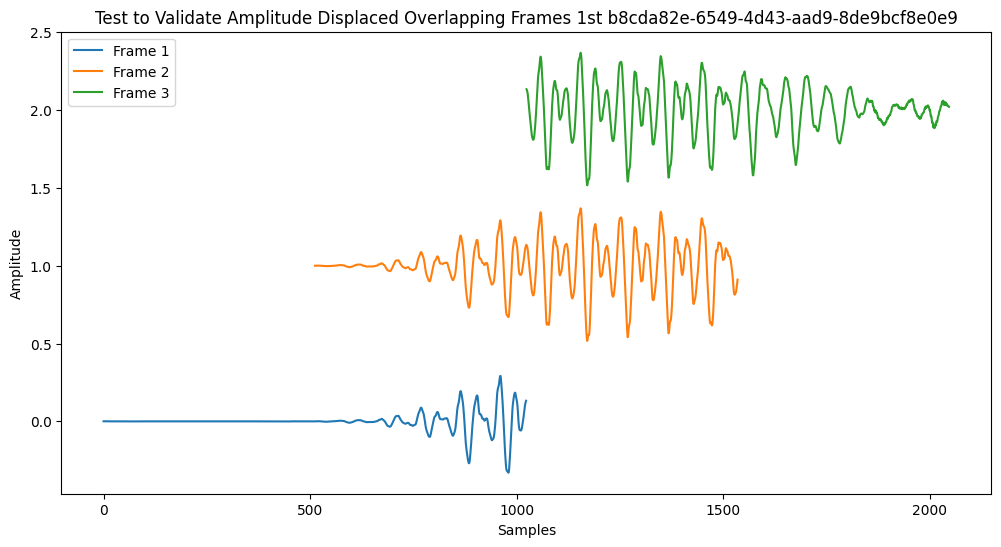

Hop Length: 512


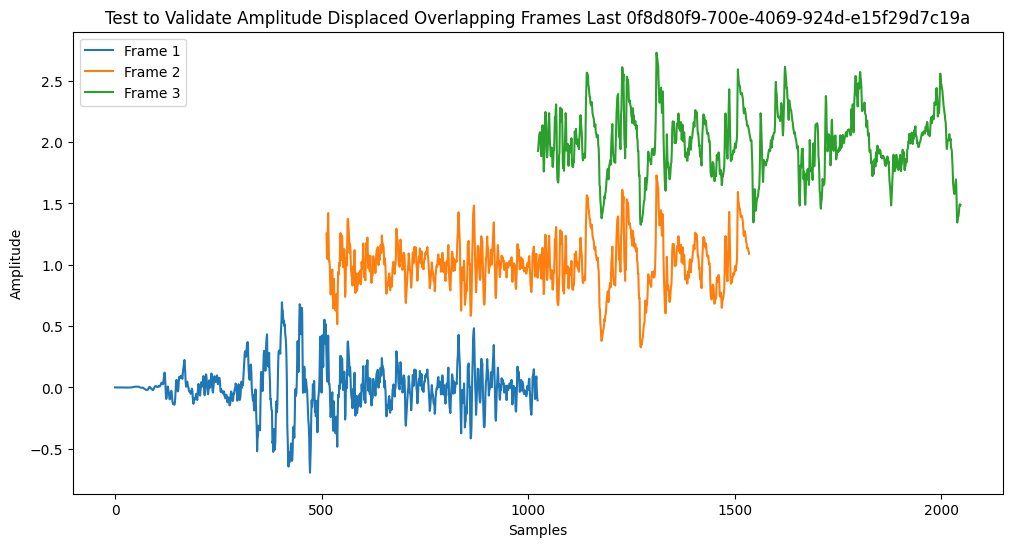

In [8]:
frame = Framing()

all_frames_from_save = frame.apply_framing(audio_df=df_from_save, frame_sizes=[1024,2048])
df_frame_from_save = all_frames_from_save[1024]
df_frame_from_save.head(3)

visual_set = {"1st":df_frame_from_save.head(1)["key"].values[0],"Last":df_frame_from_save.tail(1)["key"].values[0]}
frame.visualize_overlapping_frames(title='Test to Validate Amplitude Displaced Overlapping Frames', framed_df=df_frame_from_save, visual_set=visual_set)

# Feature Extraction

## Spectogram
- Execution Time: Aproximately 2 minutes

In [9]:
from feature_extraction import Spectrogram
spectogram = Spectrogram()
#help(ffe)

starting: 1024
using n_fft:127, hop length:64, win_length:127


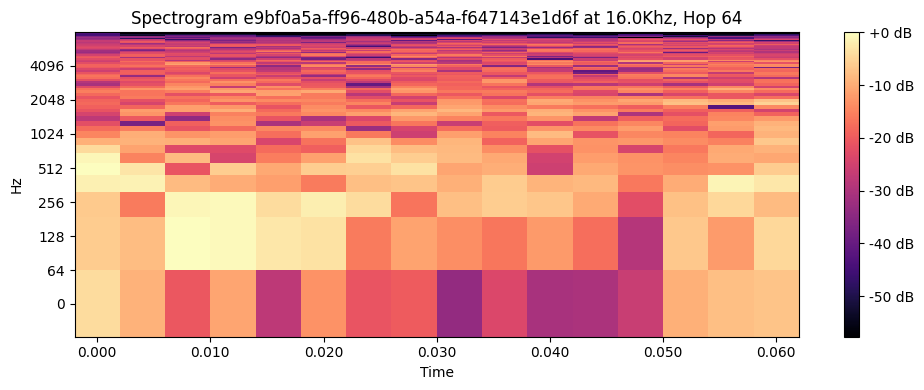

shape of stft (64, 16)
shape of the frame (1024,)


,key,sf,start,end,max_amp,frame_index,amp,label,stft
79515,9821da28-7655-4736-abf8-4c89582e407f,16000,0,1024,0.000260,0,"[2.4100282e-19, 4.552187e-20, -4.743169e-19, -...",0,"[[-51.059193, -51.059193, -51.059193, -51.0591..."
79516,9821da28-7655-4736-abf8-4c89582e407f,16000,512,1536,0.000527,1,"[-2.2809586e-13, 2.4235616e-13, -2.5261767e-13...",0,"[[-58.507927, -58.507927, -58.507927, -58.5079..."
79517,9821da28-7655-4736-abf8-4c89582e407f,16000,1024,2048,0.000737,2,"[5.5891054e-05, 0.00021803637, 0.00024021938, ...",0,"[[-18.885334, -32.74474, -24.695766, -35.10622..."
79518,9821da28-7655-4736-abf8-4c89582e407f,16000,1536,2560,0.000922,3,"[1.42881745e-05, -3.4426583e-05, 2.6231002e-05...",0,"[[-11.560276, -21.754932, -18.039566, -18.9115..."
79519,9821da28-7655-4736-abf8-4c89582e407f,16000,2048,3072,0.000922,4,"[0.0008490162, 0.0005570182, 0.00032274745, 0....",0,"[[-28.875217, -18.529537, -17.38078, -24.56908..."
...,...,...,...,...,...,...,...,...,...
79810,9821da28-7655-4736-abf8-4c89582e407f,16000,151040,152064,0.000035,295,"[-7.700891e-08, -1.1894869e-08, 8.98313e-08, -...",0,"[[-6.08123, -14.986046, -11.597763, -18.588615..."
79811,9821da28-7655-4736-abf8-4c89582e407f,16000,151552,152576,0.000057,296,"[2.8354348e-06, 2.6322938e-05, 2.7386598e-06, ...",0,"[[-19.990303, -18.756165, -19.800034, -8.37455..."
79812,9821da28-7655-4736-abf8-4c89582e407f,16000,152064,153088,0.000057,297,"[-1.4644161e-06, 2.2830393e-06, -5.1760608e-06...",0,"[[-4.9242554, -31.57219, -7.556259, -15.962433..."
79813,9821da28-7655-4736-abf8-4c89582e407f,16000,152576,153600,0.000062,298,"[-7.7346846e-07, 4.2284967e-09, 6.061488e-07, ...",0,"[[-27.41166, -6.1541214, -8.564682, -11.30648,..."


In [10]:
frame_size = 1024

obs = 64  #The number of frequency bins in the output (output bin size - obs)

n_fft = (obs * 2) - 1   #sub-frame size
win_length = n_fft  #apply windowing function to the entire length of the frame

hop_percent = 50
hop_length = (n_fft + 1) * hop_percent // 100

df_1024_spectogram = spectogram.get_spectogram_dataset(
    frame_size=frame_size,
    frames_dic=all_frames_from_save,
    limit=0,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=win_length,
    use_gpu=False
)

# save dataset in cache / temp storage, it helps to free up memory when fully implemented
spectogram.save_spectogram_data(df=df_1024_spectogram, file_name=frame_size, dir='', temporary=True)

#visualize only 1 spectogram for confirmation
key = 411
spectogram.plot_spectrogram( file_name=df_1024_spectogram['key'][key], S_DB=np.array(df_1024_spectogram['stft'][key]), sr=df_1024_spectogram['sf'][key], hop_length=64 )
print('shape of stft', df_1024_spectogram['stft'][key].shape )
print('shape of the frame', df_1024_spectogram['amp'][key].shape )

df_1024_spectogram[ df_1024_spectogram['key'] == '9821da28-7655-4736-abf8-4c89582e407f' ]

# Exploring the Dataset & Validation Metrics

## Frames of 64ms frame
- Frame Size: 1024
- Sampling Freq.: 16kHz
- Frame Length: 1024 / 16000 = 64ms

In [11]:
df_1024_spectogram.info()

print('\n\nNumber of Unique Recordings')
pd.DataFrame(df_1024_spectogram["key"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82957 entries, 0 to 82956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          82957 non-null  object 
 1   sf           82957 non-null  int64  
 2   start        82957 non-null  int64  
 3   end          82957 non-null  int64  
 4   max_amp      82957 non-null  float32
 5   frame_index  82957 non-null  int64  
 6   amp          82957 non-null  object 
 7   label        82957 non-null  int64  
 8   stft         82957 non-null  object 
dtypes: float32(1), int64(5), object(3)
memory usage: 5.4+ MB


Number of Unique Recordings


,key
count,82957
unique,300
top,94cefab8-6d46-41c3-908e-59553106ad03
freq,3477


### Get Audio Recording Labels

In [12]:
df_from_save[df_from_save['cough_start_end'].isna()].head(3)

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
key,,,,,,,,
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...","[6.2792744e-12, 1.3262988e-11, 2.1134771e-11, ...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
b9408db9-881b-4a95-ba6c-ac51602955a6,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...","[5.454812e-10, -7.5795303e-10, -2.2023776e-09,...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28dce505-46b3-4b16-8671-4a243081edf7,"[-1.8913547e-10, 1.7924169e-10, -1.7608776e-10...","[-1.126613e-11, -6.521088e-11, 7.452916e-11, -...",16000,22050,[157440],[216972],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
unique_df = pd.DataFrame(np.unique( df_1024_spectogram["key"].values, return_counts=True)).T

#add labels to unique recordings
unique_df[2] = 1
unique_df.loc[ unique_df[0].isin( df_from_save[df_from_save['cough_start_end'].isna()].index ), 2 ] = 0

# verify representation of both labels
print(np.unique( unique_df[2].values, return_counts=True) )

unique_df = unique_df.sort_values(by=[1], ascending=False)
unique_df

(array([0, 1]), array([150, 150]))


,0,1,2
201,94cefab8-6d46-41c3-908e-59553106ad03,3477,0
51,29241394-8a28-46f5-8b62-a062b4564c5c,3370,0
78,3efae714-d35d-4833-bcb8-781e13a212c3,1568,0
222,acafeba1-00a6-4db2-a8df-ba11b11d4d71,1562,0
203,98d7734d-5522-40da-9f04-b349f9a32916,1394,0
...,...,...,...
248,c49baa84-8fe0-455b-95ff-51ec0751c967,47,0
114,5590325c-4d14-43b0-a13f-409c056f19a7,47,0
186,873b83fe-9f60-4322-8fb2-065c9fce556c,47,0
184,85d0222c-3a14-473a-8823-c2216254444f,44,0


In [14]:
unique_df.sort_values(by=[2], ascending=False)

,0,1,2
190,8956ab9c-a0ca-4f2e-ae00-1f5d0065d50b,306,1
74,37ac823b-4e39-4e85-a6c1-5e1e79979a13,306,1
22,0dcae895-e7c6-4e47-a399-29f22b37e075,306,1
101,4c58cf95-9b2e-4091-adaa-0ac06a355c48,147,1
285,eceaa3a9-f850-4ba9-82ee-1bcd2575b99c,147,1
...,...,...,...
65,31a3f56d-a5e1-447b-85e9-9f5448d905d1,306,0
57,2dcb1d01-bc91-431b-b75f-65b6111f05e3,306,0
70,35c32cc2-583d-44db-92ca-7e5566c39d31,306,0
83,41d73d3b-afbc-48c0-b904-31df3a12b90b,306,0


## Validating shortest recording
- Length of shortest recording: 64ms * 40 frames / 50% overlap = 1.28 seconds
- Filename = ce5ae235-fa9f-4ded-ba7b-623b78cf76a3.wav

In [15]:
unique_df[0].tail(1).values[0]

'ce5ae235-fa9f-4ded-ba7b-623b78cf76a3'

In [16]:
import IPython
## validation was also performed with the original audio data file
#from simple_ingestion import SimpleInjestion

#si = SimpleInjestion()
#audio_filename = si.copy_files_to_colab(f"{GDRIVE_DATA_DIR}audio_files.7z")
#!7z x "{audio_filename}" -o/content/
#EXTRACTED_AUDIO_DIR = "AWS Audio Files"

#amp, sf = librosa.load(f'/content/{EXTRACTED_AUDIO_DIR}/{unique_df[0].tail(1).values[0]}.wav')

#sf_resampled = 16000
#amp_resampled = librosa.resample(amp, orig_sr=sf, target_sr=sf_resampled)

#duration_seconds = librosa.get_duration(y=amp, sr=sf)
#print(f"Duration of the audio file: {duration_seconds} seconds")

#IPython.display.Audio(data=amp_resampled, rate=sf_resampled)

In [17]:
amp, sf = df_from_save.loc[[unique_df[0].tail(1).values[0]], ['amp','sf']].values[0]
duration_seconds = librosa.get_duration(y=amp, sr=sf)

print(f"Duration of the audio file: {duration_seconds} seconds")
IPython.display.Audio(data=amp, rate=sf)

Duration of the audio file: 1.32 seconds


- 1.32 seconds is the original length of the audio file and its different from 1.28 seconds after framing
- This difference is as a result of spliting into frames of 1024ms, as there are only 1320/1024 = 1.2891

# Cross Validation

## Get Train-test Recordings
- shuffle is set to false, to simplify the visualization of the process only, it will be set to true when being used


In [18]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

def sono_cross_val(X, n_splits, shuffle=False, plot=False):
  """Perform cross validation on the audio dataset, ensuring that all frames from each recording is retained in specific set (train/test)

  Returns:
    df(pd.DataFrame)
  """
  # KFold cross-validator
  if shuffle:
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=6)
  else:
    kf = KFold(n_splits=n_splits)

  kf.get_n_splits(X)
  print(kf)

  # Initialize a list to store fold information
  fold_info = []

  if plot:
    # Visualization setup
    fig, ax = plt.subplots(figsize=(16, 6))

  # Iterate through each fold and collect the details
  for i, (train_index, test_index) in enumerate(kf.split(X)):
      fold_details = {
          'Fold': i,
          'Audio Train Size': len(train_index),
          'Audio Test Size': len(test_index),
          'Frames Train Size': sum(X[train_index][:,1]),
          'Frames Test Size': sum(X[test_index][:,1]),
          'Total Frames': sum(X[test_index][:,1]) + sum(X[train_index][:,1]),
          'Train Index': train_index,
          'Test Index': test_index,
          'Train Data': X[train_index],
          'Test Data': X[test_index]
      }
      fold_info.append(fold_details)

      if plot:
        # Bar chart visualization
        for train_idx in train_index:
            ax.barh(i, 1, left=train_idx, color='blue', edgecolor='k', alpha=0.5, label='Train' if i == 0 and train_idx == train_index[0] else "")
        for test_idx in test_index:
            ax.barh(i, 1, left=test_idx, color='red', edgecolor='k', alpha=0.5, label='Test' if i == 0 and test_idx == test_index[0] else "")

  if plot:
    # Plot settings
    ax.set_xlabel('Audio Recording Index')
    ax.set_ylabel('Fold Index')
    ax.set_title('K-Fold Cross-Validation Splits')
    ax.set_yticks(range(n_splits))
    ax.set_yticklabels([f'Fold {i+1}' for i in range(n_splits)])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.grid(True)
    plt.show()

  # Convert the list of dictionaries to a DataFrame
  return pd.DataFrame(fold_info)

KFold(n_splits=5, random_state=None, shuffle=False)


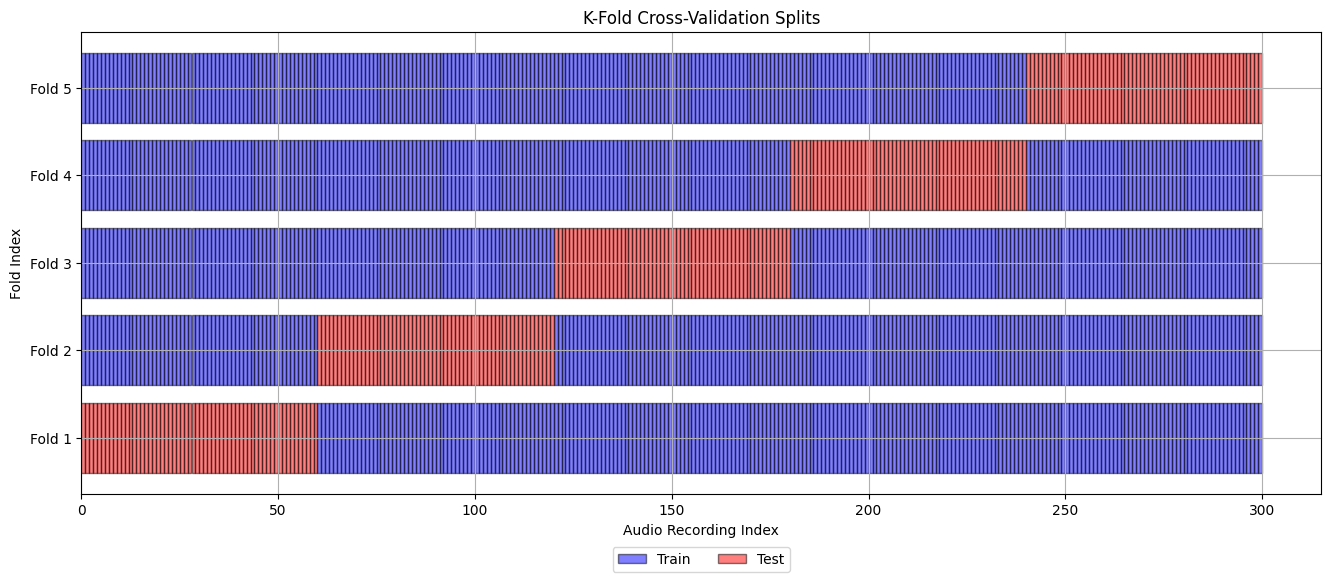

,Fold,Audio Train Size,Audio Test Size,Frames Train Size,Frames Test Size,Total Frames,Train Index,Test Index,Train Data,Test Data
0,0,240,60,53988,28969,82957,"[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[eade4e05-0fe3-4736-8a9c-35467d078113, 308, 1...","[[94cefab8-6d46-41c3-908e-59553106ad03, 3477, ..."
1,1,240,60,64562,18395,82957,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...","[[94cefab8-6d46-41c3-908e-59553106ad03, 3477, ...","[[eade4e05-0fe3-4736-8a9c-35467d078113, 308, 1..."
2,2,240,60,64641,18316,82957,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[120, 121, 122, 123, 124, 125, 126, 127, 128, ...","[[94cefab8-6d46-41c3-908e-59553106ad03, 3477, ...","[[48aafde6-7640-4f29-913b-92fd3c4a3a72, 306, 0..."
3,3,240,60,69209,13748,82957,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[180, 181, 182, 183, 184, 185, 186, 187, 188, ...","[[94cefab8-6d46-41c3-908e-59553106ad03, 3477, ...","[[008ba489-31ad-44d8-856b-fcf72369dc46, 304, 1..."
4,4,240,60,79428,3529,82957,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[240, 241, 242, 243, 244, 245, 246, 247, 248, ...","[[94cefab8-6d46-41c3-908e-59553106ad03, 3477, ...","[[4c2840ed-fd4b-4a86-b976-5cc040d6ea4e, 102, 1..."


In [19]:
df_xy_audio = sono_cross_val(X=unique_df.values, n_splits=5, plot=True)
df_xy_audio


**Validation Criteria**
- Ensure that test frames + train frames = total frames

In [20]:
print('Total Frames:', np.sum(unique_df.values[:,1]) )

Total Frames: 82957


### Get Train-Test Frames
- Validate by comparing frames

In [21]:
for index, row in df_xy_audio.iterrows():
  test_df = df_1024_spectogram[df_1024_spectogram['key'].isin(row["Test Data"][:,0])]
  train_df = df_1024_spectogram[df_1024_spectogram['key'].isin(row["Train Data"][:,0])]

  print('Fold: ', index+1, '\n-Tain:\tFrame Size (Dataset):', train_df['key'].count(), '\t\tFrame Size (CV Split):', row["Frames Train Size"], '\t\tAudio Files:', len(row["Train Data"]))
  print('-Test:\tFrame Size (Dataset):', test_df['key'].count(), '\t\tFrame Size (CV Split):', row["Frames Test Size"], '\t\tAudio Files:', len(row["Test Data"]),'\n')

#visualize last fold test_df
test_df

Fold:  1 
-Tain:	Frame Size (Dataset): 53988 		Frame Size (CV Split): 53988 		Audio Files: 240
-Test:	Frame Size (Dataset): 28969 		Frame Size (CV Split): 28969 		Audio Files: 60 

Fold:  2 
-Tain:	Frame Size (Dataset): 64562 		Frame Size (CV Split): 64562 		Audio Files: 240
-Test:	Frame Size (Dataset): 18395 		Frame Size (CV Split): 18395 		Audio Files: 60 

Fold:  3 
-Tain:	Frame Size (Dataset): 64641 		Frame Size (CV Split): 64641 		Audio Files: 240
-Test:	Frame Size (Dataset): 18316 		Frame Size (CV Split): 18316 		Audio Files: 60 

Fold:  4 
-Tain:	Frame Size (Dataset): 69209 		Frame Size (CV Split): 69209 		Audio Files: 240
-Test:	Frame Size (Dataset): 13748 		Frame Size (CV Split): 13748 		Audio Files: 60 

Fold:  5 
-Tain:	Frame Size (Dataset): 79428 		Frame Size (CV Split): 79428 		Audio Files: 240
-Test:	Frame Size (Dataset): 3529 		Frame Size (CV Split): 3529 		Audio Files: 60 



,key,sf,start,end,max_amp,frame_index,amp,label,stft
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,1024,0.006137,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0,"[[-80.0, -80.0, -80.0, -80.0, -38.62269, -34.8..."
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,1536,0.023188,1,"[-0.00024980583, -0.00026363018, -0.0002713691...",0,"[[-73.59495, -47.903156, -48.333363, -37.50980..."
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1024,2048,0.074459,2,"[-0.0018562947, -0.0023917924, -0.0028657983, ...",0,"[[-37.807816, -28.536388, -28.100117, -35.3743..."
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1536,2560,0.074459,3,"[0.0014159846, -0.0015856944, -0.0045660823, -...",0,"[[-13.141369, -17.590893, -20.784939, -16.6004..."
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,2048,3072,0.079874,4,"[0.031991042, 0.025611315, 0.019131511, 0.0129...",0,"[[-15.273092, -16.074526, -15.98427, -15.96480..."
...,...,...,...,...,...,...,...,...,...
80704,292549ba-9607-4143-a106-fe430576e42a,16000,25600,26624,0.082293,50,"[0.04829943, 0.051571563, 0.05199808, 0.051229...",0,"[[-16.243841, -28.705103, -26.386276, -31.0160..."
80705,292549ba-9607-4143-a106-fe430576e42a,16000,26112,27136,0.056057,51,"[0.048520837, 0.04630344, 0.043934256, 0.04160...",0,"[[-19.434996, -28.080738, -31.073364, -18.8980..."
80706,292549ba-9607-4143-a106-fe430576e42a,16000,26624,27648,0.056057,52,"[0.0025846986, -0.0030932352, -0.009758431, -0...",0,"[[-9.023485, -23.537653, -30.24972, -27.485758..."
80707,292549ba-9607-4143-a106-fe430576e42a,16000,27136,28160,0.021320,53,"[-0.0032224508, -0.00097361044, -0.00026815708...",0,"[[-15.499206, -9.075339, -13.769784, -15.82015..."


# Create Python Module for Cross Validation
- Put it all together as a python module
- Test Criteria: last fold test df should be the same with the one above (test_df)

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# deprecated
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

class SonoCrossValSplit:
    """
    A class to perform cross-validation on audio datasets, ensuring that all frames from each recording
    are retained within specific sets (train/test).

    Attributes:
        df (pd.DataFrame): The DataFrame containing the audio dataset.
        audio_file_column_name (str): The column name in the DataFrame representing the audio file keys.
    """

    def __init__(self, df_single_frame, audio_file_column_name='key'):
        """
        Initializes the SonoCrossValSplit with the dataset and audio file column name.

        Parameters:
            df_single_frame (pd.DataFrame): The DataFrame containing the audio dataset.
            audio_file_column_name (str): The column name in the DataFrame representing the audio file keys.
                                          Defaults to 'key'.
        """
        self.set_df(df_single_frame, audio_file_column_name)

    def set_df(self, df, audio_file_column_name):
        """
        Sets the DataFrame and audio file column name for the class.

        Parameters:
            df (pd.DataFrame): The DataFrame containing the audio dataset.
            audio_file_column_name (str): The column name in the DataFrame representing the audio file keys.
        """
        self.df = df
        self.audio_file_column_name = audio_file_column_name

    def get_audio_files(self):
        """
        Retrieves a DataFrame of unique audio files and their counts from the dataset.

        Returns:
            pd.DataFrame: A DataFrame with unique audio files and their corresponding counts, sorted in descending order.
        """
        unique_df = pd.DataFrame(np.unique(self.df[self.audio_file_column_name].values, return_counts=True)).T
        return unique_df.sort_values(by=[1], ascending=False)

    def cross_val(self, n_splits=5, shuffle=False, plot=False, show_fold_info=False):
        """
        Performs cross-validation on the audio dataset, ensuring that all frames from each recording
        are retained within specific sets (train/test).

        Parameters:
            n_splits (int): Number of folds for cross-validation. Defaults to 5.
            shuffle (bool): Whether to shuffle the data before splitting into batches. Defaults to False.
            plot (bool): Whether to plot the cross-validation splits. Defaults to False.
            show_fold_info (bool): Whether to show details of each fold of the cross validation process. Defaults to False.

        Returns:
            list: List of Tuples containing train and test indexes
        """
        split_audio = self.split_audio_files(n_splits=n_splits, shuffle=shuffle, plot=plot)
        cv_list = []
        for index, row in split_audio.iterrows():
          test_df = self.df[self.df[self.audio_file_column_name].isin(row["Test Data"][:,0])]
          train_df = self.df[self.df[self.audio_file_column_name].isin(row["Train Data"][:,0])]

          cv_list.append((train_df.index, test_df.index))

          if show_fold_info:
            print('Fold: ', index+1,
                  '\n-Tain:\tFrame Size (Dataset):', train_df[self.audio_file_column_name].count(),
                  '\t\tFrame Size (CV Split):', row["Frames Train Size"],
                  '\t\tAudio Files:', len(row["Train Data"]))

            print('-Test:\tFrame Size (Dataset):', test_df[self.audio_file_column_name].count(),
                  '\t\tFrame Size (CV Split):', row["Frames Test Size"],
                '\t\tAudio Files:', len(row["Test Data"]),'\n')

        return cv_list

    def split_audio_files(self, n_splits=5, shuffle=False, plot=False):
        """
        Split audio files for cross-validation .

        Parameters:
            n_splits (int): Number of folds for cross-validation. Defaults to 5.
            shuffle (bool): Whether to shuffle the data before splitting into batches. Defaults to False.
            plot (bool): Whether to plot the cross-validation splits. Defaults to False.

        Returns:
            pd.DataFrame: A DataFrame containing details of each fold, including train/test sizes and indices.
        """
        X = self.get_audio_files().values

        # KFold cross-validator
        if shuffle:
            kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=6)
        else:
            kf = KFold(n_splits=n_splits)

        kf.get_n_splits(X)
        print(kf, '\tTotal Audio Files:', X.shape[0])

        # Initialize a list to store fold information
        fold_info = []

        if plot:
            # Visualization setup
            fig, ax = plt.subplots(figsize=(16, 6))

        # Iterate through each fold and collect the details
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            fold_details = {
                'Fold': i,
                'Audio Train Size': len(train_index),
                'Audio Test Size': len(test_index),
                'Frames Train Size': sum(X[train_index][:,1]),
                'Frames Test Size': sum(X[test_index][:,1]),
                'Total Frames': sum(X[test_index][:,1]) + sum(X[train_index][:,1]),
                'Train Index': train_index,
                'Test Index': test_index,
                'Train Data': X[train_index],
                'Test Data': X[test_index]
            }
            fold_info.append(fold_details)

            if plot:
                # Bar chart visualization
                for train_idx in train_index:
                    ax.barh(i, 1, left=train_idx, color='blue', edgecolor='k', alpha=0.5, label='Train' if i == 0 and train_idx == train_index[0] else "")
                for test_idx in test_index:
                    ax.barh(i, 1, left=test_idx, color='red', edgecolor='k', alpha=0.5, label='Test' if i == 0 and test_idx == test_index[0] else "")

        if plot:
            # Plot settings
            ax.set_xlabel('Audio Recording Index')
            ax.set_ylabel('Fold Index')
            ax.set_title('K-Fold Cross-Validation Splits')
            ax.set_yticks(range(n_splits))
            ax.set_yticklabels([f'Fold {i+1}' for i in range(n_splits)])
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
            plt.grid(True)
            plt.show()

        # Convert the list of dictionaries to a DataFrame
        return pd.DataFrame(fold_info)


KFold(n_splits=5, random_state=None, shuffle=False) 	Total Audio Files: 300


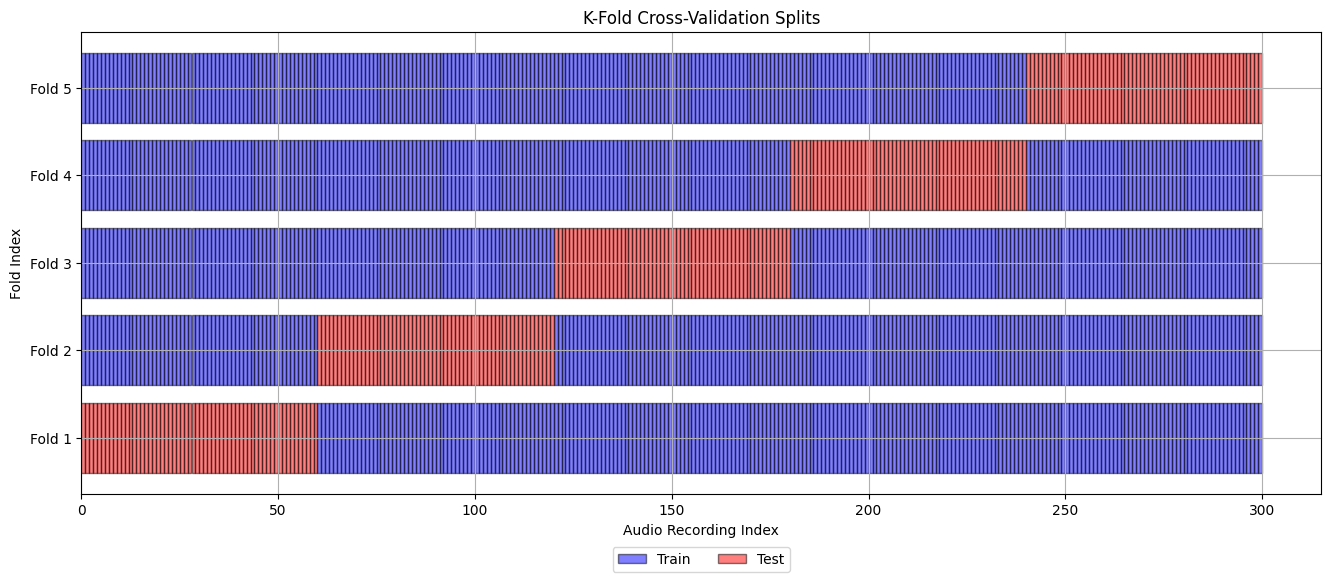

Fold:  1 
-Tain:	Frame Size (Dataset): 53988 		Frame Size (CV Split): 53988 		Audio Files: 240
-Test:	Frame Size (Dataset): 28969 		Frame Size (CV Split): 28969 		Audio Files: 60 

Fold:  2 
-Tain:	Frame Size (Dataset): 64562 		Frame Size (CV Split): 64562 		Audio Files: 240
-Test:	Frame Size (Dataset): 18395 		Frame Size (CV Split): 18395 		Audio Files: 60 

Fold:  3 
-Tain:	Frame Size (Dataset): 64641 		Frame Size (CV Split): 64641 		Audio Files: 240
-Test:	Frame Size (Dataset): 18316 		Frame Size (CV Split): 18316 		Audio Files: 60 

Fold:  4 
-Tain:	Frame Size (Dataset): 69209 		Frame Size (CV Split): 69209 		Audio Files: 240
-Test:	Frame Size (Dataset): 13748 		Frame Size (CV Split): 13748 		Audio Files: 60 

Fold:  5 
-Tain:	Frame Size (Dataset): 79428 		Frame Size (CV Split): 79428 		Audio Files: 240
-Test:	Frame Size (Dataset): 3529 		Frame Size (CV Split): 3529 		Audio Files: 60 



In [24]:
cv = SonoCrossValSplit(df_single_frame=df_1024_spectogram)
cv_set = cv.cross_val(shuffle=False, plot=True, show_fold_info=True)

In [25]:
# verify test - last fold test df should be the same with the one above (test_df)
df_1024_spectogram.loc[cv_set[-1][1]]

,key,sf,start,end,max_amp,frame_index,amp,label,stft
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,1024,0.006137,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0,"[[-80.0, -80.0, -80.0, -80.0, -38.62269, -34.8..."
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,1536,0.023188,1,"[-0.00024980583, -0.00026363018, -0.0002713691...",0,"[[-73.59495, -47.903156, -48.333363, -37.50980..."
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1024,2048,0.074459,2,"[-0.0018562947, -0.0023917924, -0.0028657983, ...",0,"[[-37.807816, -28.536388, -28.100117, -35.3743..."
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1536,2560,0.074459,3,"[0.0014159846, -0.0015856944, -0.0045660823, -...",0,"[[-13.141369, -17.590893, -20.784939, -16.6004..."
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,2048,3072,0.079874,4,"[0.031991042, 0.025611315, 0.019131511, 0.0129...",0,"[[-15.273092, -16.074526, -15.98427, -15.96480..."
...,...,...,...,...,...,...,...,...,...
80704,292549ba-9607-4143-a106-fe430576e42a,16000,25600,26624,0.082293,50,"[0.04829943, 0.051571563, 0.05199808, 0.051229...",0,"[[-16.243841, -28.705103, -26.386276, -31.0160..."
80705,292549ba-9607-4143-a106-fe430576e42a,16000,26112,27136,0.056057,51,"[0.048520837, 0.04630344, 0.043934256, 0.04160...",0,"[[-19.434996, -28.080738, -31.073364, -18.8980..."
80706,292549ba-9607-4143-a106-fe430576e42a,16000,26624,27648,0.056057,52,"[0.0025846986, -0.0030932352, -0.009758431, -0...",0,"[[-9.023485, -23.537653, -30.24972, -27.485758..."
80707,292549ba-9607-4143-a106-fe430576e42a,16000,27136,28160,0.021320,53,"[-0.0032224508, -0.00097361044, -0.00026815708...",0,"[[-15.499206, -9.075339, -13.769784, -15.82015..."


## Test Python Module

In [26]:
print(os.listdir(GDRIVE_COMPONENT_DIR))

import sys
sys.path.append(GDRIVE_COMPONENT_DIR)

['__init__.py', 'framing.py', 'simple_ingestion.py', 'sono_cross_val.py', 'utils.py', '__pycache__', '.ipynb_checkpoints', 'sono_cross_val_zcr.py', 'train_with_zcr.py', 'feature_extraction_melspectogram.py', 'feature_extraction.py']


Sono Cross Val Split
 KFold(n_splits=5, random_state=None, shuffle=False) 	Total Audio Files: 300


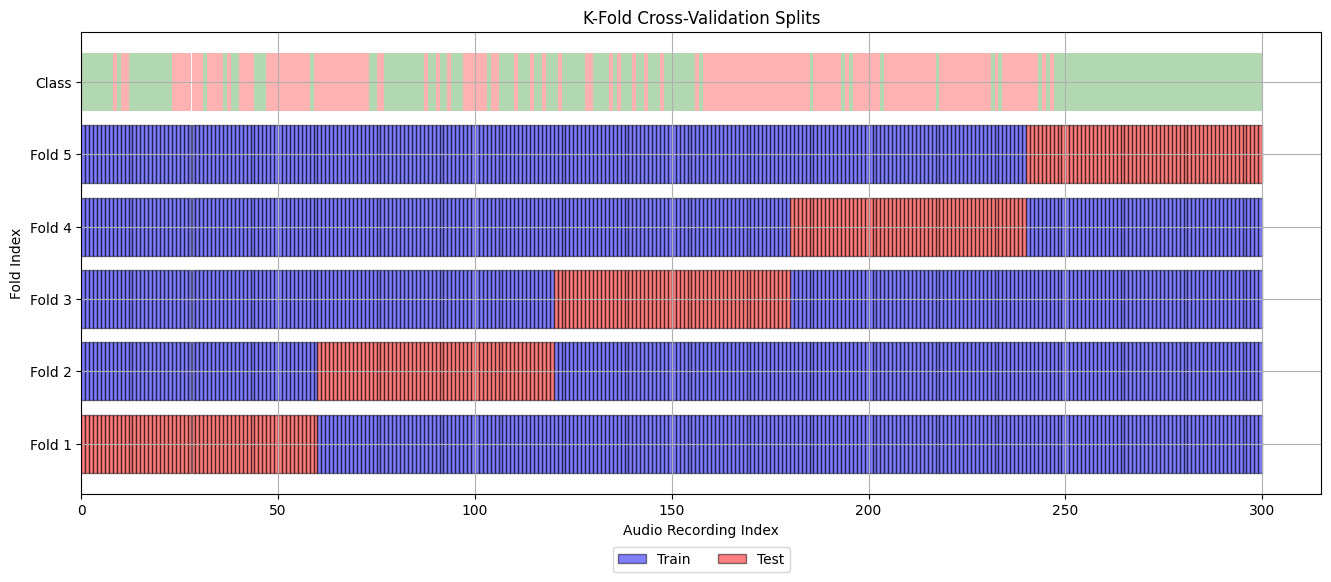

Fold:  1 
-Train:	Frame Size (Dataset): 53988 		Frame Size (CV Split): 53988 		Audio Files: 240
-Test:	Frame Size (Dataset): 28969 		Frame Size (CV Split): 28969 		Audio Files: 60 

Fold:  2 
-Train:	Frame Size (Dataset): 64562 		Frame Size (CV Split): 64562 		Audio Files: 240
-Test:	Frame Size (Dataset): 18395 		Frame Size (CV Split): 18395 		Audio Files: 60 

Fold:  3 
-Train:	Frame Size (Dataset): 64641 		Frame Size (CV Split): 64641 		Audio Files: 240
-Test:	Frame Size (Dataset): 18316 		Frame Size (CV Split): 18316 		Audio Files: 60 

Fold:  4 
-Train:	Frame Size (Dataset): 69209 		Frame Size (CV Split): 69209 		Audio Files: 240
-Test:	Frame Size (Dataset): 13748 		Frame Size (CV Split): 13748 		Audio Files: 60 

Fold:  5 
-Train:	Frame Size (Dataset): 79428 		Frame Size (CV Split): 79428 		Audio Files: 240
-Test:	Frame Size (Dataset): 3529 		Frame Size (CV Split): 3529 		Audio Files: 60 



,key,sf,start,end,max_amp,frame_index,amp,label,stft
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,1024,0.006137,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0,"[[-80.0, -80.0, -80.0, -80.0, -38.62269, -34.8..."
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,1536,0.023188,1,"[-0.00024980583, -0.00026363018, -0.0002713691...",0,"[[-73.59495, -47.903156, -48.333363, -37.50980..."
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1024,2048,0.074459,2,"[-0.0018562947, -0.0023917924, -0.0028657983, ...",0,"[[-37.807816, -28.536388, -28.100117, -35.3743..."
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1536,2560,0.074459,3,"[0.0014159846, -0.0015856944, -0.0045660823, -...",0,"[[-13.141369, -17.590893, -20.784939, -16.6004..."
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,2048,3072,0.079874,4,"[0.031991042, 0.025611315, 0.019131511, 0.0129...",0,"[[-15.273092, -16.074526, -15.98427, -15.96480..."
...,...,...,...,...,...,...,...,...,...
80704,292549ba-9607-4143-a106-fe430576e42a,16000,25600,26624,0.082293,50,"[0.04829943, 0.051571563, 0.05199808, 0.051229...",0,"[[-16.243841, -28.705103, -26.386276, -31.0160..."
80705,292549ba-9607-4143-a106-fe430576e42a,16000,26112,27136,0.056057,51,"[0.048520837, 0.04630344, 0.043934256, 0.04160...",0,"[[-19.434996, -28.080738, -31.073364, -18.8980..."
80706,292549ba-9607-4143-a106-fe430576e42a,16000,26624,27648,0.056057,52,"[0.0025846986, -0.0030932352, -0.009758431, -0...",0,"[[-9.023485, -23.537653, -30.24972, -27.485758..."
80707,292549ba-9607-4143-a106-fe430576e42a,16000,27136,28160,0.021320,53,"[-0.0032224508, -0.00097361044, -0.00026815708...",0,"[[-15.499206, -9.075339, -13.769784, -15.82015..."


In [27]:
from sono_cross_val import CrossValSplit
cvs_k = CrossValSplit(df_single_frame=df_1024_spectogram, non_cough_keys=df_from_save[df_from_save['cough_start_end'].isna()].index )
cvs_set = cvs_k.cross_val(shuffle=False, plot=True, show_fold_info=True)
df_1024_spectogram.loc[cv_set[-1][1]]

### Test Shuffle Split

Sono Cross Val Split
 KFold(n_splits=5, random_state=6, shuffle=True) 	Total Audio Files: 300


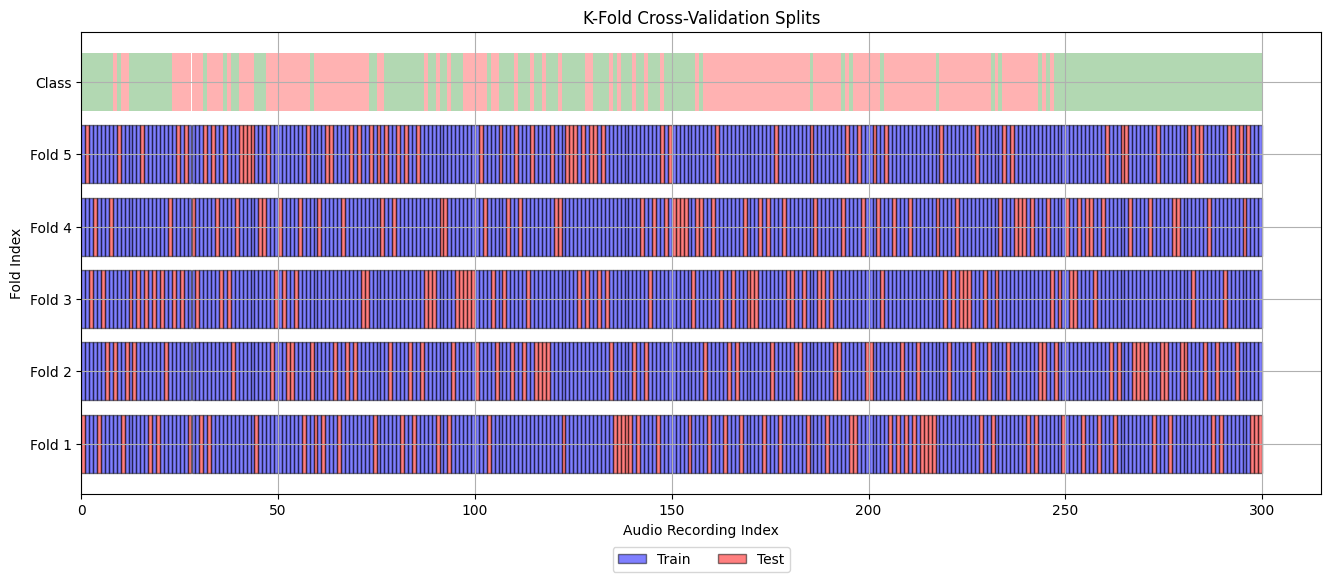

Fold:  1 
-Train:	Frame Size (Dataset): 64449 		Frame Size (CV Split): 64449 		Audio Files: 240
-Test:	Frame Size (Dataset): 18508 		Frame Size (CV Split): 18508 		Audio Files: 60 

Fold:  2 
-Train:	Frame Size (Dataset): 69293 		Frame Size (CV Split): 69293 		Audio Files: 240
-Test:	Frame Size (Dataset): 13664 		Frame Size (CV Split): 13664 		Audio Files: 60 

Fold:  3 
-Train:	Frame Size (Dataset): 65508 		Frame Size (CV Split): 65508 		Audio Files: 240
-Test:	Frame Size (Dataset): 17449 		Frame Size (CV Split): 17449 		Audio Files: 60 

Fold:  4 
-Train:	Frame Size (Dataset): 67615 		Frame Size (CV Split): 67615 		Audio Files: 240
-Test:	Frame Size (Dataset): 15342 		Frame Size (CV Split): 15342 		Audio Files: 60 

Fold:  5 
-Train:	Frame Size (Dataset): 64963 		Frame Size (CV Split): 64963 		Audio Files: 240
-Test:	Frame Size (Dataset): 17994 		Frame Size (CV Split): 17994 		Audio Files: 60 



,key,sf,start,end,max_amp,frame_index,amp,label,stft
436,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,0,1024,0.0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
437,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,512,1536,0.0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
438,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,1024,2048,0.0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
439,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,1536,2560,0.0,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
440,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,2048,3072,0.0,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
82234,52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,155136,156160,0.0,303,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
82235,52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,155648,156672,0.0,304,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
82236,52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,156160,157184,0.0,305,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
82237,52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,156672,157696,0.0,306,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [28]:
from sono_cross_val import CrossValSplit
cv_shuffled = CrossValSplit(df_single_frame=df_1024_spectogram, non_cough_keys=df_from_save[df_from_save['cough_start_end'].isna()].index)
cv_shuffled_data = cv_shuffled.cross_val(shuffle=True, plot=True, show_fold_info=True)

df_1024_spectogram.loc[cv_shuffled_data[-1][1]]

### Test Stratified Kfold

Sono Cross Val Split
 StratifiedKFold(n_splits=5, random_state=None, shuffle=False) 	Total Audio Files: 300


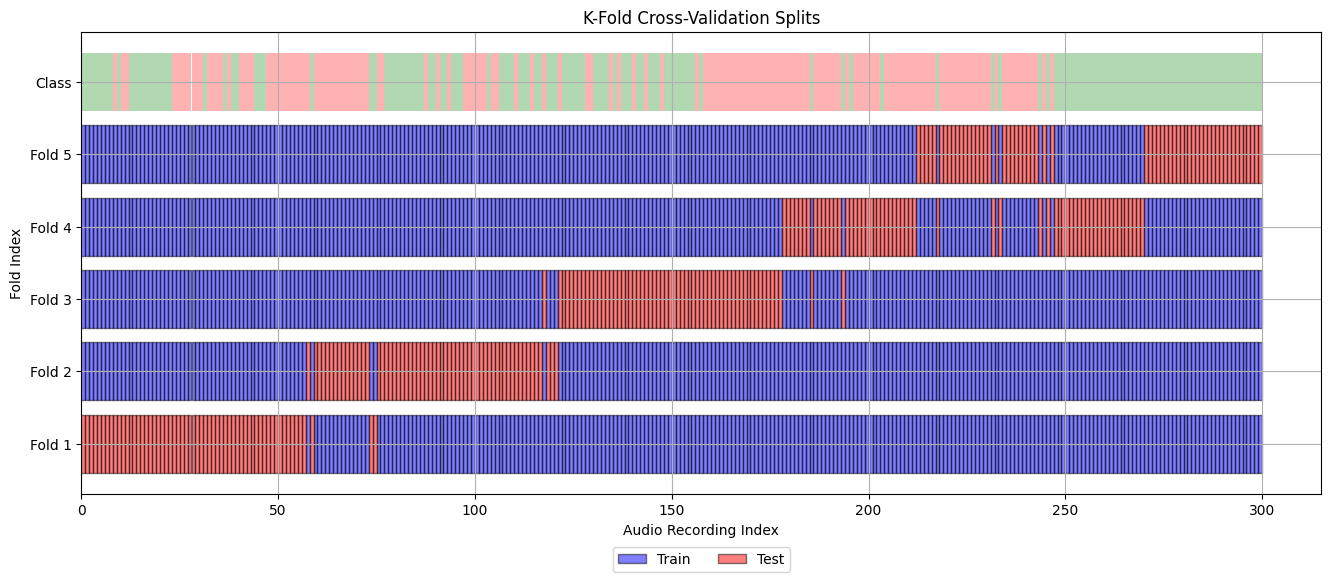

Fold:  1 
-Train:	Frame Size (Dataset): 53988 		Frame Size (CV Split): 53988 		Audio Files: 240
-Test:	Frame Size (Dataset): 28969 		Frame Size (CV Split): 28969 		Audio Files: 60 

Fold:  2 
-Train:	Frame Size (Dataset): 64562 		Frame Size (CV Split): 64562 		Audio Files: 240
-Test:	Frame Size (Dataset): 18395 		Frame Size (CV Split): 18395 		Audio Files: 60 

Fold:  3 
-Train:	Frame Size (Dataset): 64648 		Frame Size (CV Split): 64648 		Audio Files: 240
-Test:	Frame Size (Dataset): 18309 		Frame Size (CV Split): 18309 		Audio Files: 60 

Fold:  4 
-Train:	Frame Size (Dataset): 71674 		Frame Size (CV Split): 71674 		Audio Files: 240
-Test:	Frame Size (Dataset): 11283 		Frame Size (CV Split): 11283 		Audio Files: 60 

Fold:  5 
-Train:	Frame Size (Dataset): 76956 		Frame Size (CV Split): 76956 		Audio Files: 240
-Test:	Frame Size (Dataset): 6001 		Frame Size (CV Split): 6001 		Audio Files: 60 



,key,sf,start,end,max_amp,frame_index,amp,label,stft
436,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,0,1024,0.000000,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
437,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,512,1536,0.000000,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
438,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,1024,2048,0.000000,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
439,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,1536,2560,0.000000,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
440,e4729edf-12e5-4ba9-883e-1114c32b90f0,16000,2048,3072,0.000000,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
82952,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,59904,60928,0.021871,117,"[-0.021708837, -0.022235444, -0.021958912, -0....",0,"[[-22.220215, -1.6691847, -11.069354, -17.3987..."
82953,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60416,61440,0.001310,118,"[0.00046911323, 0.0005246451, 0.00047831138, 0...",0,"[[-11.030172, -9.076239, -7.558161, -11.594187..."
82954,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60928,61952,0.000399,119,"[4.2529864e-05, 2.6461403e-05, 3.3375203e-05, ...",0,"[[-26.488285, -41.698566, -23.835926, -16.2859..."
82955,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,61440,62464,0.000332,120,"[0.0003304775, 0.0003139911, 0.00031356188, 0....",0,"[[0.0, -12.379341, -0.9513588, -12.329109, -21..."


In [29]:
from sono_cross_val import CrossValSplit
cv_strat = CrossValSplit(df_single_frame=df_1024_spectogram, non_cough_keys=df_from_save[df_from_save['cough_start_end'].isna()].index)
cv_strat_data = cv_strat.cross_val(stratified=True, shuffle=False, plot=True, show_fold_info=True)

df_1024_spectogram.loc[cv_strat_data[-1][1]]

### Verification of Stratified Kfold
- It ensure that both classes are equally represented in train and test dataset

In [66]:
dfr = cv_strat.get_result()
frames_split_ratio = {"Train Cough":[], "Train Non Cough":[], "% Cough Train":[], "Test Cough":[], "Test Non Cough":[], "% Cough Test":[]}
for x, row in dfr.iterrows():
  #print(row['Train Index'], row['Test Index'])
  dd = df_1024_spectogram[ df_1024_spectogram['key'].isin(row['Train Data'][:,0]) ]
  #dd = row['Train Data'][:,0]
  #print( df_1024_spectogram.loc[row['Train Index']] )
  frames_split_ratio["Train Cough"].append(len(dd[dd['label'] == 1]))
  frames_split_ratio["Train Non Cough"].append(len(dd[dd['label'] == 0]))
  frames_split_ratio["% Cough Train"].append( len(dd[dd['label'] == 1]) * 100 / ( len(dd[dd['label'] == 1]) + len(dd[dd['label'] == 0]) ) )

  dd = df_1024_spectogram[ df_1024_spectogram['key'].isin(row['Test Data'][:,0]) ]
  frames_split_ratio["Test Cough"].append(len(dd[dd['label'] == 1]))
  frames_split_ratio["Test Non Cough"].append(len(dd[dd['label'] == 0]))
  frames_split_ratio["% Cough Test"].append( len(dd[dd['label'] == 1]) * 100 / ( len(dd[dd['label'] == 1]) + len(dd[dd['label'] == 0]) ) )

#dfr
pd.DataFrame(frames_split_ratio)

,Train Cough,Train Non Cough,% Cough Train,Test Cough,Test Non Cough,% Cough Test
0,6787,47201,12.571312,2005,26964,6.921192
1,7067,57495,10.946067,1725,16670,9.377548
2,6824,57824,10.555624,1968,16341,10.748812
3,6828,64846,9.526467,1964,9319,17.406718
4,7662,69294,9.956339,1130,4871,18.830195


In [30]:
res = ['Fold','Audio Train Size','Audio Test Size','Cough Audio Train Size','Cough Audio Test Size','Frames Train Size','Frames Test Size', 'Total Frames']
cv_strat.get_result()[res]

,Fold,Audio Train Size,Audio Test Size,Cough Audio Train Size,Cough Audio Test Size,Frames Train Size,Frames Test Size,Total Frames
0,0,240,60,120,30,53988,28969,82957
1,1,240,60,120,30,64562,18395,82957
2,2,240,60,120,30,64648,18309,82957
3,3,240,60,120,30,71674,11283,82957
4,4,240,60,120,30,76956,6001,82957


### Comparison with Kfold and Shuffled Kfold

In [31]:
cv_shuffled.get_result()[res]

,Fold,Audio Train Size,Audio Test Size,Cough Audio Train Size,Cough Audio Test Size,Frames Train Size,Frames Test Size,Total Frames
0,0,240,60,120,30,64449,18508,82957
1,1,240,60,119,31,69293,13664,82957
2,2,240,60,115,35,65508,17449,82957
3,3,240,60,125,25,67615,15342,82957
4,4,240,60,121,29,64963,17994,82957


In [32]:
cvs_k.get_result()[res]

,Fold,Audio Train Size,Audio Test Size,Cough Audio Train Size,Cough Audio Test Size,Frames Train Size,Frames Test Size,Total Frames
0,0,240,60,118,32,53988,28969,82957
1,1,240,60,121,29,64562,18395,82957
2,2,240,60,119,31,64641,18316,82957
3,3,240,60,97,53,69209,13748,82957
4,4,240,60,145,5,79428,3529,82957


In [33]:
dic = {'Cross Val':[], 'Fold':[], 'Class Balance':[]}
dic2 = {}
for i in [ ('Stratified Kfold', cv_strat.get_result()[res] ), ('Shuffled Kfold', cv_shuffled.get_result()[res] ), ('Kfold', cvs_k.get_result()[res] ) ]:
  dic2[i[0]] = []
  for x, row in i[1].iterrows():
    dic['Cross Val'].append(i[0])
    dic['Fold'].append(x)
    dic['Class Balance'].append( ( row['Cough Audio Train Size'] / row['Audio Train Size'] ))
    dic2[i[0]].append( ( row['Cough Audio Train Size'] / row['Audio Train Size'] ))

pd.DataFrame(dic2, index=[f'Fold {i+1}' for i in range(len(cv_strat.get_result()))])

,Stratified Kfold,Shuffled Kfold,Kfold
Fold 1,0.5,0.500000,0.491667
Fold 2,0.5,0.495833,0.504167
Fold 3,0.5,0.479167,0.495833
Fold 4,0.5,0.520833,0.404167
Fold 5,0.5,0.504167,0.604167
